In [3]:
import numpy as np
import matplotlib.pyplot as plt
from eventQueue import EventQueue
from line import Line       
from statusStructure import StatusStructure

class FindIntersections():
    def __init__(self):
        self.Q = EventQueue()
        self.T = StatusStructure()        
        self.intersections = []
        
    def find_intersections(self, lines):
        for line in lines:
            self.Q.insert_line(line)
        while not self.Q.is_empty():
            next_event = self.Q.pop_next_event()
            self.handle_event_point(next_event)
            
    def handle_event_point(self, p):
        U_p = p.lines
        L_p, C_p, L_C = self.T.find_segments_contain(p.point)
        U_C = U_p + C_p
        L_U_C = L_C + U_p
        if len(L_U_C) > 1:
            self.intersections.append(p.point)
        for line in L_C:
            self.T.delete(p.point, line)
        self.T.insert(p.point, U_C)
        self.T._print_name()
        if len(U_C) == 0:
            s_l = self.T.find_left_neighbor(p.point)
            s_r = self.T.find_right_neighbor(p.point)
            self.find_new_event(s_l, s_r, p.point)
        else:
            s_lm = self.T.find_leftmost(p.point)
            s_l = self.T.find_left_neighbor(p.point)
            self.find_new_event(s_lm, s_l, p.point)
            s_rm = self.T.find_rightmost(p.point)
            s_r = self.T.find_right_neighbor(p.point)
            self.find_new_event(s_rm, s_r, p.point)
            
            
    def find_new_event(self, s_l, s_r, p):
        if s_l is None or s_r is None:
            return
        i = s_l.intersect(s_r)
        if i is None:
            return
        x_i, y_i = i
        x_p, y_p = p
        if y_i < y_p or (y_i == y_p and x_i > x_p):
            self.Q.insert(i)
        
if __name__ == '__main__':
    line_1 = Line((0, 0), (1, 2))
    line_2 = Line((1, 2), (2, 3))
    line_3 = Line((2, 3), (3, 2))
    line_4 = Line((3, 2), (2, 1))
    line_5 = Line((2, 1), (0, 0))
    line_6 = Line((2, 1), (2, 3))
    line_7 = Line((1, 2), (4, 2))
    line_8 = Line((1, 1), (1, 1.5))
    line_9 = Line((1, 1.5), (1.5, 1))
    line_10 = Line((1.5, 1), (1, 1))
    line_11 = Line((0, 0), (3, 3))
    lines = [line_1, line_2, line_3, line_4, line_5, line_6, line_7, line_8, line_9, line_10, line_11]

    i = 1
    for line in lines:
        line.name = 'line_'+str(i)
        i += 1
    def find_and_plot(lines):
        plt.axis('equal')
        def plot_line(line):
            x = line[0]
            y = line[1]
            plt.plot((x[0], y[0]), (x[1], y[1]), 'ro-')
        for line in lines:
            plot_line((line.upper_endpoint, line.lower_endpoint))
        F = FindIntersections()
        F.find_intersections(lines)
        for point in F.intersections:
            plt.plot(point[0], point[1], marker='x', markersize=10, color="blue")
        return F.intersections
    print(find_and_plot(lines))

['line_2', 'line_6', 'line_3']
['line_2', 'line_6', 'line_3', 'line_11']
['line_2', 'line_6', 'line_11', 'line_3']
['line_1', 'line_7', 'line_6', 'line_11', 'line_3']
['line_1', 'line_11', 'line_6', 'line_7', 'line_3']
['line_1', 'line_11', 'line_6', 'line_4', 'line_7']
['line_1', 'line_11', 'line_6', 'line_4']
['line_1', 'line_8', 'line_9', 'line_11', 'line_6', 'line_4']
['line_1', 'line_8', 'line_11', 'line_9', 'line_6', 'line_4']
['line_1', 'line_11', 'line_10', 'line_9', 'line_6', 'line_4']
['line_1', 'line_11', 'line_6', 'line_4']
['line_1', 'line_11', 'line_5']
[]
[(2, 3), (2.5, 2.5), (1, 2), (2.0, 2.0), (3, 2), (1, 1.5), (1.25, 1.25), (1, 1), (1.5, 1), (2, 1), (0, 0)]


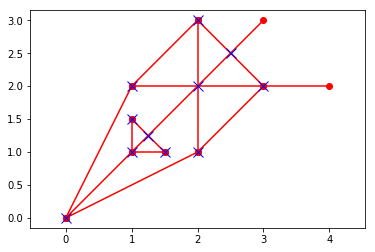

In [4]:
plt.show()

## Read PLY file

In [5]:
from plyfile import PlyData, PlyElement

In [7]:
plydata = PlyData.read('test.ply')

In [8]:
plydata

PlyData((PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float')), count=8, comments=[]), PlyElement('face', (PlyListProperty('vertex_index', 'uchar', 'int'),), count=6, comments=[])), text=True, byte_order='=', comments=['made by anonymous', 'this file is a cube'], obj_info=[])

## DCEL

In [15]:
class Vertex():
    def __init__(self, coordinate = [0, 0 ,0], half_edge = None, attr = None):
        self.x = coordinate[0]
        self.y = coordinate[1]
        self.z = coordinate[2]
        self.attr = attr
    def set_edge(self, hafl_edge):
        self.incident_edge = half_edge
        
class HalfEdge():
    def __init__(self, origin = None):
        self.origin = origin
        
    def set_twin(self, twin):
        self.twin = twin
    def set_next(self, next_edge):
        self.next = next_edge
    def set_prev(self, prev_edge):
        self.prev = prev_edge
    def set_face(self, incident_f):
        self.incident_face = incident_f
        
class Face():
    def __init__(self, inner_component = [], outer_component = None):
        self.outer = outer_component
        self.inner = inner_component
        
    def add_inner(self, new_component):
        self.inner.append(new_component)

In [14]:
class DCEL():
    def __init__(Vertex, HalfEdge, Face):
        self.Vertex = Vertex
        self.HalfEdge = HalfEdge
        self.Face = Face
        
    def read_from_file(file):
        plydata = PlyData.read('test.ply')
        vertecies = []
        for v in plydata.elements[0].data:
            vertex = Vertex(v)
            vertecis.append(vertex)
            
        halfedges = []    
        for f in plydata.elements[1].data:
            for i in f:
                edge = HalfEdge()

array([(array([0, 1, 2, 3]),), (array([7, 6, 5, 4]),),
       (array([0, 4, 5, 1]),), (array([1, 5, 6, 2]),),
       (array([2, 6, 7, 3]),), (array([3, 7, 4, 0]),)],
      dtype=[('vertex_index', 'O')])

In [16]:
plydata.elements[0].data

array([( 0.,  0.,  0.), ( 0.,  0.,  1.), ( 0.,  1.,  1.), ( 0.,  1.,  0.),
       ( 1.,  0.,  0.), ( 1.,  0.,  1.), ( 1.,  1.,  1.), ( 1.,  1.,  0.)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4')])